# Contact Trajectories

Sometimes you're interested in how contacts evolve in a trajectory, frame-by-frame. Contact Map Explorer provides the `ContactTrajectory` class for this purpose.

We'll look at this using a trajectory of a specific inhibitor during its binding process to GSK3B. This system is also studied in the notebook on contact concurrences (with very similar initial discussion).

In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from contact_map import ContactTrajectory, RollingContactFrequency
import mdtraj as md
traj = md.load("data/gsk3b_example.h5")
print(traj)  # to see number of frames; size of system

<mdtraj.Trajectory with 100 frames, 5704 atoms, 360 residues, and unitcells>


First, we'll use MDTraj's [atom selection language](http://mdtraj.org/latest/atom_selection.html) to split out the protein and the ligand, which has residue name YYG in the input files. We're only interested in contacts between the protein and the ligand (not contacts within the protein). We'll also only look at heavy atom contacts.

In [2]:
topology = traj.topology
yyg = topology.select('resname YYG and element != "H"')
protein = topology.select('protein and element != "H"')

## Making an accessing a contact trajectory

Contact trajectories have the same keyword arguments as other contact objects

In [3]:
contacts = ContactTrajectory(traj, query=yyg, haystack=protein)

Once the `ContactTrajectory` has been made, contacts for individual frames can be accessed either by taking the index of the `ContactTrajectory` itself, or by getting the list of contact (e.g., all the residue contacts frame-by-frame) and selecting the frame of interest.

In [4]:
contacts[0].residue_contacts.most_common()

[([YYG351, SER32], 1.0), ([YYG351, GLY31], 1.0), ([ASN30, YYG351], 1.0)]

In [5]:
contacts.residue_contacts[0].most_common()

[([YYG351, SER32], 1.0), ([YYG351, GLY31], 1.0), ([ASN30, YYG351], 1.0)]

Advanced Python indexing is also allowed. In this example, note how the most common partners for YYG change! This is also what we see in the contact concurrences example.

In [6]:
for contact in contacts[50:80:4]:
    print(contact.residue_contacts.most_common()[:3])

[([VAL27, YYG351], 1.0), ([ARG107, YYG351], 1.0), ([ILE28, YYG351], 1.0)]
[([VAL27, YYG351], 1.0), ([ILE28, YYG351], 1.0), ([GLN151, YYG351], 1.0)]
[([VAL27, YYG351], 1.0), ([ASN30, YYG351], 1.0), ([GLY34, YYG351], 1.0)]
[([ASP166, YYG351], 1.0), ([PHE33, YYG351], 1.0), ([LYS149, YYG351], 1.0)]
[([YYG351, SER32], 1.0), ([VAL53, YYG351], 1.0), ([PHE33, YYG351], 1.0)]
[([GLU63, YYG351], 1.0), ([VAL53, YYG351], 1.0), ([PHE33, YYG351], 1.0)]
[([ASP166, YYG351], 1.0), ([VAL53, YYG351], 1.0), ([PHE33, YYG351], 1.0)]
[([YYG351, GLY168], 1.0), ([YYG351, SER32], 1.0), ([ASP166, YYG351], 1.0)]


We can easily turn the `ContactTrajectory` into `ContactFrequency`:

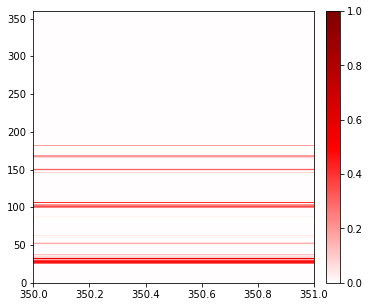

In [7]:
freq = contacts.contact_frequency()

fig, ax = plt.subplots(figsize=(5.5,5))
freq.residue_contacts.plot_axes(ax=ax)
ax.set_xlim(*contacts.query_residue_range);

## Rolling Contact Frequencies

A `ContactTrajectory` keeps all the time-dependent information about the contacts, whereas a `ContactFrequency`, as plotted above, loses all of it. What about something in between? For this, we have a `RollingContactFrequency`, which acts like a rolling average. It creates a contact frequency over a certain window of frames, with a certain step size between each window.

This can be created either with the `RollingContactFrequency` object, or, more easily, with the `ContactTrajectory.rolling_frequency()` method.

In [8]:
RollingContactFrequency(contacts, width=30, step=14)

In [9]:
rolling_frequencies = contacts.rolling_frequency(window_size=30, step=14)
rolling_frequencies

Now we'll plot each windowed frequency, and we will see the transition as some contacts fade out and others grow in.

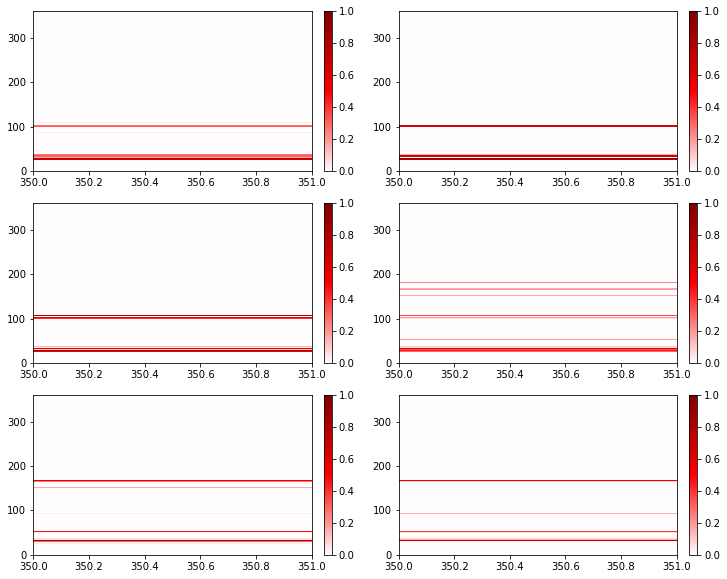

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
for ax, freq in zip(axs.flatten(), rolling_frequencies):
    freq.residue_contacts.plot_axes(ax=ax)
    ax.set_xlim(*contacts.query_residue_range);